# Experimental Design in Python

## Experimental Design Preliminaries

### Setting up experiments

#### Non-random assignment of subjects
An agricultural firm is conducting an experiment to measure how feeding sheep different types of grass affects their weight. They have asked for your help to properly set up the experiment. One of their managers has said you can perform the subject assignment by taking the top 250 rows from the DataFrame and that should be fine.

Your task is to use your analytical skills to demonstrate why this might not be a good idea. Assign the subjects to two groups using non-random assignment (the first 250 rows) and observe the differences in descriptive statistics.

You have received the DataFrame, weights which has a column containing the weight of the sheep and a unique id column.

numpy and pandas have been imported as np and pd, respectively.

In [65]:
import numpy as np
import pandas as pd

In [66]:
df_chick_weights = pd.read_csv(r'.\data\chick_weight.csv')
df_chick_weights.head()

,weight,Time,Chick,Diet
0,42,0,1,1
1,51,2,1,1
2,59,4,1,1
3,64,6,1,1
4,76,8,1,1


In [67]:
# Non-random assignment
group1_non_rand = df_chick_weights.loc[:289,['weight']]
group2_non_rand = df_chick_weights.loc[289:,['weight']]

# Compare descriptive statistics of groups
compare_df_non_rand = \
    pd.concat(
        [group1_non_rand['weight'].describe(),
        group2_non_rand['weight'].describe()],
        axis=1
    )
compare_df_non_rand.columns = ['group1', 'group2']

# Print to assess
print(compare_df_non_rand)

           group1      group2
count  290.000000  289.000000
mean   106.831034  137.145329
std     61.521165   76.707912
min     35.000000   39.000000
25%     59.000000   69.000000
50%     89.000000  126.000000
75%    141.750000  186.000000
max    331.000000  373.000000


#### Random assignment of subjects
Having built trust from your last work with the agricultural firm, you have been given the task of properly setting up the experiment.

Use your knowledge of best practice experimental design set up to assign the sheep to two even groups of 250 each.

In [68]:
# Randomly assign half
group1_random = df_chick_weights.sample(
    frac=0.5,
    random_state=42,
    replace=False
)

# Create second assignment
group2_random = df_chick_weights.drop(
    group1_random.index
)

# Compare assignments
compare_df_random = pd.concat(
    [group1_random['weight'].describe(),
    group2_random['weight'].describe()],
    axis=1
)
compare_df_random.columns = ['group1', 'group2']
print(compare_df_random)

           group1      group2
count  289.000000  289.000000
mean   120.044983  123.591696
std     70.089685   72.118725
min     35.000000   39.000000
25%     62.000000   63.000000
50%    105.000000  103.000000
75%    163.000000  164.000000
max    373.000000  361.000000


### Experimental data setup

#### Test

In [69]:
df_chick_weights.head()

,weight,Time,Chick,Diet
0,42,0,1,1
1,51,2,1,1
2,59,4,1,1
3,64,6,1,1
4,76,8,1,1


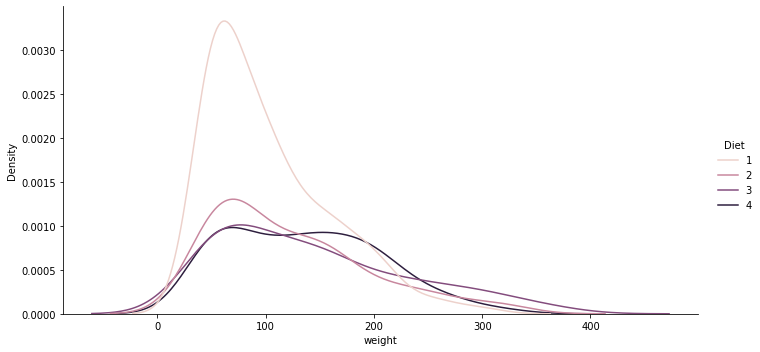

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

sns.displot(  data=df_chick_weights,
              x='weight',
              hue='Diet',
              kind='kde',
              aspect=2
          )
plt.show();

#### Blocking experimental data

You are working with a manufacturing firm that wants to conduct some experiments on worker productivity. Their dataset only contains 100 rows, so it's important that experimental groups are balanced.

This sounds like a great opportunity to use your knowledge of blocking to assist them. They have provided a productivity_subjects DataFrame. Split the provided dataset into two even groups of 50 entries each.

## Experimental Design Techniques

### Factorial designs: principles and applications

In [71]:
import pandas as pd
marketing_data = pd.read_feather(r'./data/marketing_data.feather')
marketing_data.head()

,Messaging_Style,Time_of_Day,Click_Through_Rate,Conversions
0,Casual,Morning,0.640465,500
1,Formal,Evening,0.698533,598
2,Casual,Morning,0.257834,234
3,Casual,Evening,0.922971,602
4,Casual,Morning,0.476893,314


In [72]:
marketing_pivot =\
  pd.pivot_table(
    marketing_data,
    values='Conversions',
    index='Messaging_Style',
    columns='Time_of_Day',
    aggfunc='mean'
)
print(marketing_pivot)

Time_of_Day         Evening     Morning
Messaging_Style                        
Casual           402.329004  401.133891
Formal           432.913043  411.096000


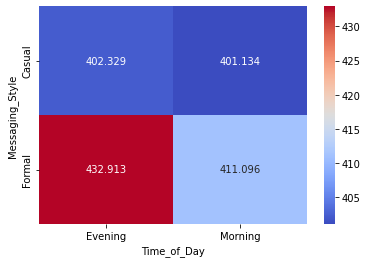

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
# Visualize interactions with a heatmap
sns.heatmap(
    marketing_pivot,
    annot=True,
    cmap='coolwarm',
    fmt='g')

plt.show()

### Randomized block design: controlling variance

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
athletes = pd.read_csv(r'.\data\athletic_perf.csv')
athletes.head(3)

,Athlete_ID,Training_Program,Diet_Type,Initial_Fitness,Performance_Inc
0,1,Strength,Keto,Low,8.749524
1,2,HIIT,Plant-Based,High,9.452781
2,3,Strength,Plant-Based,Low,13.928506


In [80]:
athletes['Initial_Fitness'].unique()

array(['Low', 'High', 'Medium'], dtype=object)

In [77]:
athletes.groupby(by='Initial_Fitness').apply(
  lambda x: x.sample(frac=1)
)

Athlete_ID Training_Program     Diet_Type  \
Initial_Fitness                                                  
High            273         274        Endurance   Plant-Based   
                155         156         Strength          Keto   
                274         275             HIIT  High-Protein   
                265         266        Endurance  High-Protein   
                1             2             HIIT   Plant-Based   
...                         ...              ...           ...   
Medium          88           89        Endurance   Plant-Based   
                271         272        Endurance   Plant-Based   
                9            10         Strength   Plant-Based   
                175         176             HIIT   Plant-Based   
                238         239         Strength  High-Protein   

                    Initial_Fitness  Performance_Inc  
Initial_Fitness                                       
High            273            High         7.334511  
                155            High         8.619201  
                274            High        15.521524  
                265            High         4.843569  
                1              High         9.452781  
...                             ...              ...  
Medium          88           Medium        11.306799  
                271          Medium         8.166908  
                9            Medium        10.138011  
                175          Medium         8.689780  
                238          Medium         8.745379  

[300 rows x 5 columns]

In [78]:
athletes.groupby(by='Initial_Fitness').apply(
  lambda x: x.sample(frac=1)
).reset_index(drop=True)

,Athlete_ID,Training_Program,Diet_Type,Initial_Fitness,Performance_Inc
0,9,Strength,Keto,High,11.599382
1,72,Endurance,Keto,High,7.974764
2,262,Endurance,High-Protein,High,10.253586
3,220,HIIT,Keto,High,11.246799
4,131,Strength,Keto,High,12.660877
...,...,...,...,...,...
295,12,Strength,Keto,Medium,8.439313
296,158,HIIT,High-Protein,Medium,8.739175
297,121,HIIT,Keto,Medium,9.187451
298,288,Endurance,Plant-Based,Medium,10.265872


In [84]:
blocks = athletes.groupby(by='Initial_Fitness').apply(
  lambda x: x.sample(frac=1)
).reset_index(drop=True)

In [85]:
blocks['Treatment'] = np.random.choice(
  ['Test_1', 'Test_2', 'Test_3'],
  size=len(blocks)
)
blocks.sample(6)

,Athlete_ID,Training_Program,Diet_Type,Initial_Fitness,Performance_Inc,Treatment
296,111,Strength,Plant-Based,Medium,9.974512,Test_2
29,245,HIIT,Keto,High,9.960221,Test_2
37,87,Strength,Keto,High,9.115135,Test_1
28,192,Endurance,High-Protein,High,12.930780,Test_3
54,4,Strength,Plant-Based,High,9.605557,Test_2
232,150,HIIT,Plant-Based,Medium,9.221424,Test_1


In [87]:
blocks[['Initial_Fitness', 'Treatment']].value_counts().sort_index()

Initial_Fitness  Treatment
High             Test_1       28
                 Test_2       30
                 Test_3       30
Low              Test_1       36
                 Test_2       43
                 Test_3       34
Medium           Test_1       30
                 Test_2       35
                 Test_3       34
Name: count, dtype: int64

<Axes: xlabel='Initial_Fitness', ylabel='Performance_Inc'>

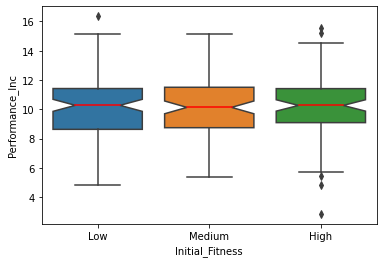

In [99]:
sns.boxplot(
  data=blocks
  , x='Initial_Fitness'
  , y='Performance_Inc'
  , notch=True
  , medianprops={'color':'r'}
  , order=['Low', 'Medium', 'High']
)

<Axes: xlabel='Initial_Fitness', ylabel='Performance_Inc'>

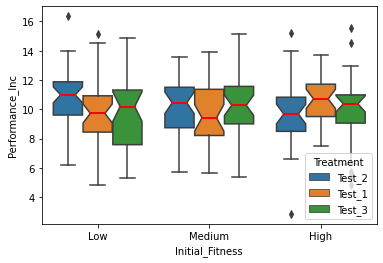

In [100]:
sns.boxplot(
  data=blocks
  , x='Initial_Fitness'
  , y='Performance_Inc'
  , hue='Treatment'
  , notch=True
  , medianprops={'color':'r', 'linewidth':2}
  , order=['Low', 'Medium', 'High']
)

In [102]:
# Perform the within blocks ANOVA, first grouping by block
import scipy.stats as scst
block_annova = blocks.groupby('Initial_Fitness').apply(
  lambda x: scst.f_oneway(
    x[x['Treatment']=='Test_1']['Performance_Inc']
    , x[x['Treatment']=='Test_2']['Performance_Inc']
    , x[x['Treatment']=='Test_3']['Performance_Inc']
  )
)
block_annova

Initial_Fitness
High      (1.3104076015588069, 0.27510250309578405)
Low       (2.5710477159639975, 0.08104395027407534)
Medium     (0.5677613756937963, 0.5686843306459846)
dtype: object

# Addidtional / Random Work

In [74]:
lst=[30, 57, 49, 21, 51, 26, 22, 77, 11]

In [32]:
import itertools as itt

In [42]:
result = []
for i in range(2, len(lst)+1):
  for _ in itt.combinations(lst,i):
    if sum(_)==207:
      result.append(_)

In [43]:
result

[(30, 49, 51, 77),
 (57, 51, 22, 77),
 (30, 57, 21, 22, 77),
 (30, 57, 21, 51, 26, 22)]

In [46]:
lst=[30, 57, 49, 21, 51, 26, 22, 77, 11]
import itertools as itt
result = []
for i in range(2, len(lst)+1):
  for _ in itt.combinations(lst,i):
    if sum(_)==207:
      result.append(_)

In [48]:
lst=[30, 57, 49, 21, 51, 26, 22, 77, 11]
import itertools as itt
result = []
for i in range(2, len(lst)+1):
  for _ in itt.combinations(lst,i):
    if sum(_)==207:
      result.append(_)
print(result)

[(30, 49, 51, 77), (57, 51, 22, 77), (30, 57, 21, 22, 77), (30, 57, 21, 51, 26, 22)]


In [50]:
import operator as op
my_list = [('Will', 23), ('Jane', 21), ('El', 24), ('Min', 101)]
max(my_list, key=op.itemgetter(1))[0]

'Min'

In [51]:
for _ in my_list:
  print(_)

('Will', 23)
('Jane', 21)
('El', 24)
('Min', 101)
